In [71]:
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score


In [20]:
restaurantes = p.read_json("rest.txt")

In [22]:
restaurantes["Cozinha1"] = restaurantes["Cozinha"].fillna('').str.split(',', n=1).str[0]

In [23]:
restaurantes["Cozinha2"] = restaurantes["Cozinha"].fillna('').str.split(',', n=1).str[1]

In [24]:
restaurantes["Bairro"] = restaurantes["Endereco"].fillna('').str.split(', ', n=1).str[1]

In [25]:
restaurantes["Bairro"] = restaurantes["Bairro"].fillna('').str.split(' -', n=1).str[0]

In [26]:
restaurantes["Bairro"] = restaurantes["Bairro"].fillna('').str.split(' ', n=1).str[1]

In [28]:
restaurantes["Almoco"] = restaurantes["Valor"].fillna('').str.split('- Almoço: ',n=1).str[1]

In [29]:
restaurantes["Almoco"] = restaurantes["Almoco"].fillna('').str.split(' - Jantar:',n=1).str[0]

In [30]:
restaurantes["Jantar"] = restaurantes["Valor"].fillna('').str.split(' - Jantar: ',n=1).str[1]

In [31]:
restaurantes["Menu"] = restaurantes["Valor"].fillna('').str.split('Menu ',n=1).str[1]

In [32]:
restaurantes["Menu"] = restaurantes["Menu"].fillna('').str.split(' -',n=1).str[0]

In [33]:
restaurantes = restaurantes[['Nome', 'Cozinha1', 'Cozinha2', 'Bairro', 'Almoco', 'Jantar', 'Menu']]

In [35]:
restaurantes

,Nome,Cozinha1,Cozinha2,Bairro,Almoco,Jantar,Menu
0,El Carreiro,Argentina,Parrilla,Stella Maris,"R$ 73,90","R$ 94,90",+Plus
1,La Lupa,Italiana,Mediterrânea,Santo Antônio Além do Carmo,"R$ 73,90","R$ 94,90",+Plus
2,Cedro - Quality Hotel e Suítes São Salvador,Contemporânea,NaN,Stiep,"R$ 73,90","R$ 94,90",+Plus
3,Canto Restaurante,Internacional,NaN,Rio Vermelho,"R$ 95,00","R$ 115,00",Premium
4,Joca Mesa Bar,Contemporânea,Regional,Santo Antônio,"R$ 73,90","R$ 94,90",+Plus
...,...,...,...,...,...,...,...
458,Pereira Restaurante - Porto da Barra,Contemporânea,NaN,Barra,"R$ 95,00","R$ 115,00",Premium
459,Pasta em Casa - Alphaville,Italiana,NaN,Alphaville I,"R$ 95,00","R$ 115,00",Premium
460,Cantina Volpi - Paralela,Italiana,NaN,Alphaville I,"R$ 73,90",NaN,+Plus
461,Seven Wonders Café - Spot Barra,,NaN,Barra,"R$ 59,90",NaN,RW


In [ ]:
temp1 = p.DataFrame(restaurantes['Cozinha1'].drop_duplicates())
temp1['Cozinha'] = temp1['Cozinha1']
temp1 = temp1.drop('Cozinha1', axis=1)
temp2 = p.DataFrame(restaurantes['Cozinha2'].drop_duplicates())
temp2['Cozinha'] = temp2['Cozinha2']
temp2 = temp2.drop('Cozinha2', axis=1)
temp = p.concat([temp1, temp2], ignore_index=True)
temp = p.DataFrame(temp['Cozinha'].drop_duplicates())
temp


,Cozinha
0,Argentina
1,Italiana
2,Contemporânea
3,Internacional
4,
5,Árabe
6,Portuguesa
7,Mediterrânea
8,Indiana
9,Japonesa


In [37]:
temp = p.DataFrame(restaurantes['Bairro'].drop_duplicates())
temp = temp.reset_index()
temp

,index,Bairro
0,0,Stella Maris
1,1,Santo Antônio Além do Carmo
2,2,Stiep
3,3,Rio Vermelho
4,4,Santo Antônio
5,7,Vilas do Atlântico
6,8,São Cristóvão
7,11,A Rio Vermelho
8,27,Pituba
9,29,NaN


In [41]:
restaurantes.describe(include='all')

,Nome,Cozinha1,Cozinha2,Bairro,Almoco,Jantar,Menu
count,463,463,79,397,463,331,463
unique,132,26,12,39,4,3,3
top,Restaurante Orí,,Regional,Caminho das Árvores,"R$ 95,00","R$ 115,00",Premium
freq,9,141,19,84,227,218,266


In [60]:
frequencia = p.DataFrame()
frequencia['Menu'] = restaurantes['Menu'].value_counts(normalize=True).mul(100).round(2)
frequencia


,Menu
Menu,
Premium,57.45
+Plus,34.99
RW,7.56


In [63]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    i, j = confusion_matrix.shape
    return (chi2 / (n * (min(i, j) - 1)))**0.5

In [67]:
tabela_contingencia = p.crosstab(restaurantes['Bairro'], restaurantes['Cozinha1'])

v_cramer = cramers_v(tabela_contingencia)
print(f"  V de Cramer (calculado): {v_cramer:.2f}")

  V de Cramer (calculado): 0.58


In [65]:
tabela_contingencia = p.crosstab(restaurantes['Bairro'], restaurantes['Menu'])

v_cramer = cramers_v(tabela_contingencia)
print(f"  V de Cramer (calculado): {v_cramer:.2f}")

  V de Cramer (calculado): 0.66


In [66]:
tabela_contingencia = p.crosstab(restaurantes['Cozinha1'], restaurantes['Menu'])

v_cramer = cramers_v(tabela_contingencia)
print(f"  V de Cramer (calculado): {v_cramer:.2f}")

  V de Cramer (calculado): 0.40


In [45]:
print("\n--- Sumarização com Tabela de Contingência (Crosstab) ---")
# Exemplo 1: Cor_Favorita vs Tipo_Filme
crosstab_filme_cor = p.crosstab(restaurantes['Menu'], restaurantes['Bairro'])
print("\nTabela de Contingência: Cor_Favorita vs Tipo_Filme\n", crosstab_filme_cor)


--- Sumarização com Tabela de Contingência (Crosstab) ---

Tabela de Contingência: Cor_Favorita vs Tipo_Filme
 Bairro   A Rio Vermelho  Acupe de Brotas  Alphaville I  Barra  Bonfim  \
Menu                                                                    
+Plus                 1                0             1     12       3   
Premium               0                1             1      5       0   
RW                    0                0             0      1       0   

Bairro   Caminho das Árvores  Candeal  Capuchinhos  Centro  Centro Histórico  \
Menu                                                                           
+Plus                     23        3            3       0                 0   
Premium                   36        4            0      12                18   
RW                        25        0            0       0                 0   

Bairro   ...  Rio Vermelho  Rio vermelho  Santiago de Compostela, S/N Brotas  \
Menu     ...                             

In [44]:
# Para obter proporções na crosstab (ex: proporção de cada linha)
crosstab_filme_cor_prop_linha = p.crosstab(restaurantes['Menu'], restaurantes['Bairro'], normalize='index').mul(100).round(2)
print("\nTabela de Contingência (Proporção por Linha):\n", crosstab_filme_cor_prop_linha)


Tabela de Contingência (Proporção por Linha):
 Bairro   A Rio Vermelho  Acupe de Brotas  Alphaville I  Barra  Bonfim  \
Menu                                                                    
+Plus              0.75             0.00          0.75   8.96    2.24   
Premium            0.00             0.44          0.44   2.19    0.00   
RW                 0.00             0.00          0.00   2.86    0.00   

Bairro   Caminho das Árvores  Candeal  Capuchinhos  Centro  Centro Histórico  \
Menu                                                                           
+Plus                  17.16     2.24         2.24    0.00              0.00   
Premium                15.79     1.75         0.00    5.26              7.89   
RW                     71.43     0.00         0.00    0.00              0.00   

Bairro   ...  Rio Vermelho  Rio vermelho  Santiago de Compostela, S/N Brotas  \
Menu     ...                                                                   
+Plus    ...          4.4

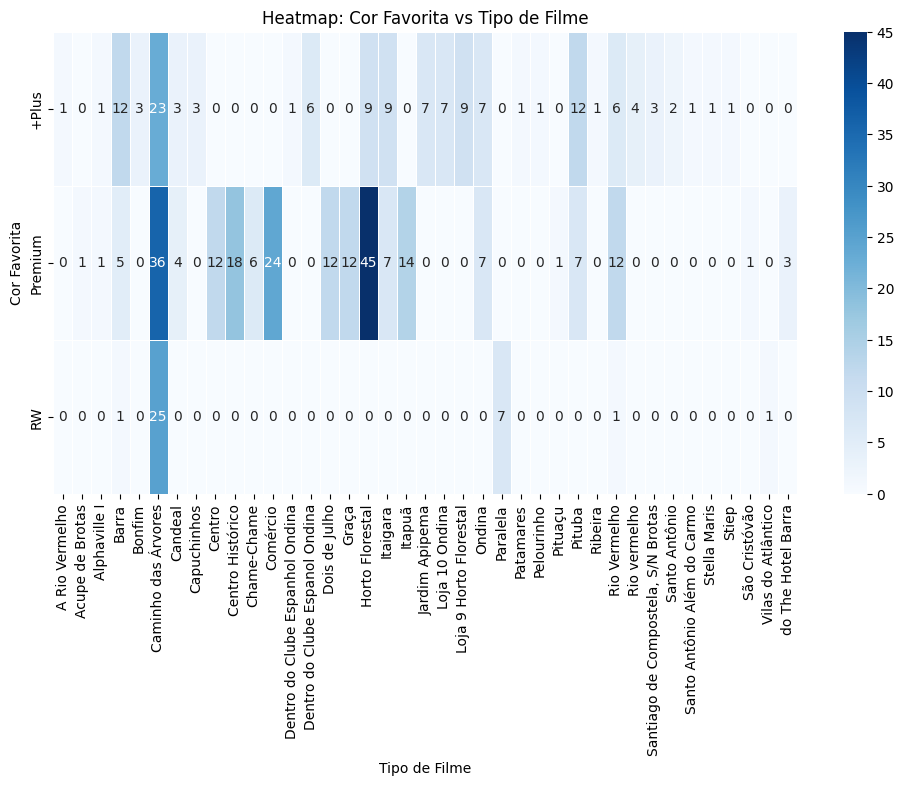

In [52]:
# Heatmap da Tabela de Contingência (para vizualizar associações)
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_filme_cor, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap: Cor Favorita vs Tipo de Filme')
plt.xlabel('Tipo de Filme')
plt.ylabel('Cor Favorita')
plt.show()

In [39]:
restaurantes.to_csv("restaurantes.csv", index=False)